In [1]:
from minisom import MiniSom
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.read_csv(".\SomDataGrouping.csv")
labels = data['color'].values
data = data.loc[:, ['r', 'g', 'b']].values
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#normalization
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
print(data[:5])
train_points, test_points, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
print("point:", train_points[0])
print("label:", train_labels[0])


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
point: [0. 1. 0.]
label: green


In [19]:
def find_closest_divider(number):


  if number == 0:
    return None

  # Check for divisibility by 2 first (most common case)
  if number % 2 == 0:
    return number // 2

  # Iterate through potential divisors, starting from 3 (odd numbers)
  divisor = 3
  while divisor * divisor <= number:
    if number % divisor == 0:
      return divisor
    divisor += 2

  # If no divisor is found within the square root, return the number itself
  return number

def merge_points(points, vector_count):
  merged = []
  vector_count = find_closest_divider(vector_count)
  for i in range(0, len(points)-vector_count, vector_count):
    merged.append(np.concatenate(points[i:i+vector_count]))
  return np.array(merged)


In [26]:
train_points_merged = merge_points(train_points, 36)
print(train_points_merged.shape)
print(train_points_merged[0])

som_dim = train_points_merged.shape[1]


(66, 54)
[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0.]


In [7]:
# formula for grid dimentions: 5 * sqrt(number of training samples)
#dimentions = 5 * np.sqrt(train_x.shape[0])
#grid_size = np.ceil(np.sqrt(dimentions))

som = MiniSom(3,3,som_dim, sigma=1, learning_rate=0.5)
som.train(train_points, 1000)


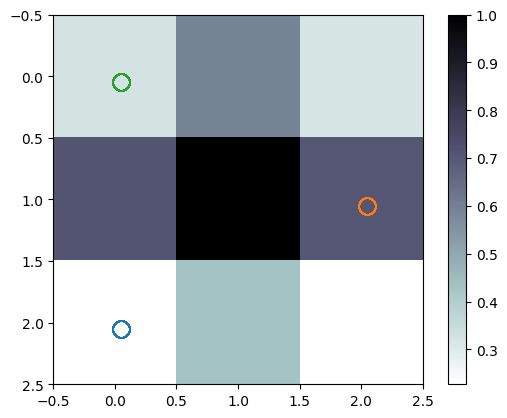

In [8]:
import matplotlib.pyplot as plt
umatrix = som.distance_map()
plt.imshow(umatrix, cmap='bone_r')  # Choose your desired colormap
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
color_dict = {"red": 1, "green": 2, "blue": 3}
for index, point in enumerate(train_points):
    w = som.winner(point)
    plt.plot(w[0]+.05, w[1]+.05, 'o', markerfacecolor='None', markeredgecolor=colors[color_dict[train_labels[index]]-1],
             markersize=12)

plt.show()

